# Avocado Squad

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

<ul>
    <li>Date - The date of the observation</li>
    <li>AveragePrice - the average price of a single avocado</li>
    <li>type - conventional or organic</li>
    <li>year - the year</li>
    <li>Region - the city or region of the observation</li>
    <li>Total Volume - Total number of avocados sold</li>
    <li>4046 - Total number of avocados with PLU 4046 sold</li>
    <li>4225 - Total number of avocados with PLU 4225 sold</li>
    <li>4770 - Total number of avocados with PLU 4770 sold</li>
    </ul>
    

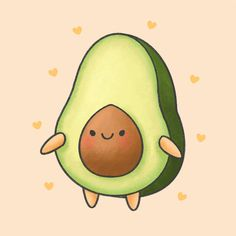

In [1]:
# import libraries 
import numpy as np 
import pandas as pd 

In [3]:
# import the data required 
data = pd.read_csv('avocado.csv')
data.head(8)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   
5           5  2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6  2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7  2015-11-08          0.98     109428.33   703.75  101815.36   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   
5   43.61     6683.91     6556.47      127.44          0.0  conventional   
6   93.26     8318.86     8196.81      122.05          0.0  conventional   
7   80.00     6829.22     6266.85      562.37          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany  
6  2015  Albany  
7  2015  Albany

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In addition to eyeballing our data with head, info helps give us a sense of the datatype in each slide, and null values we may have to deal with. Oh and speaking of nulls...

In [5]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Happiness! No imputation needed. 

Let's do a quick aside on time...

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


## Exercise 1: Let's build a Predictive model of Average Price! 

### Step 1. Copy your labels into a separate array!

In [8]:
y = data['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

### Step 2. Drop all features you're not using (including your labels, from your dataframe)

In [27]:
x = data.drop(['Date', 'AveragePrice','Unnamed: 0'], axis=1)
x

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags          type  year            region  
0           93.25          0.0  conventional  2015            Albany  
1           97.49          0.0  conventional  2015            Albany  
2          103.14          0.0  conventional  2015            Albany  
3          133.76          0.0  conventional  2015            Albany  
4          197.69          0.0  conventional  2015            Albany  
...           ...          ...           ...   ...               ...  
18244      431.85          0.0       organic  2018  WestTexNewMexico  
18245      324.80          0.0       organic  2018  WestTexNewMexico  
18246       42.31          0.0       organic  2018  WestTexNewMexico  
18247       50.00          0.0       organic  2018  WestTexNewMexico  
18248       26.01          0.0       organic  2018  WestTexNewMexico  

[18249 rows x 11 columns]

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  18249 non-null  float64
 1   4046          18249 non-null  float64
 2   4225          18249 non-null  float64
 3   4770          18249 non-null  float64
 4   Total Bags    18249 non-null  float64
 5   Small Bags    18249 non-null  float64
 6   Large Bags    18249 non-null  float64
 7   XLarge Bags   18249 non-null  float64
 8   type          18249 non-null  object 
 9   year          18249 non-null  int64  
 10  region        18249 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 1.5+ MB


### Step 3. Pipeline your features, specifically implementing your plans for your numeric and categorical features.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
avocado_num = x.drop(['region', 'type'], axis=1) 

# remove categorical features from the numeric values

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

avocado_num_tr = num_pipeline.fit_transform(avocado_num)
numerical_features = list(avocado_num)
categorical_features = ['region', 'type']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features),
    ])

avocado_prepared = full_pipeline.fit_transform(data).toarray()

In [30]:
avocado_prepared

array([[-0.22771641, -0.23081597, -0.1999022 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.23042664, -0.23110251, -0.20805446, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21208462, -0.23100731, -0.1544779 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ...,  1.        ,
         0.        ,  1.        ],
       [-0.24162464, -0.2304279 , -0.24265143, ...,  1.        ,
         0.        ,  1.        ],
       [-0.24125273, -0.22934712, -0.24317042, ...,  1.        ,
         0.        ,  1.        ]])

### Step 4. Split your data!

In [31]:
# create training and testing vars
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(avocado_prepared, y, test_size=0.2)

In [32]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14599, 65) (14599,)
(3650, 65) (3650,)


### Step 5 and 6. Train and then Test your data!

In [33]:
from sklearn.linear_model import LinearRegression


# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [34]:
predictions.shape

(3650,)

### Step 7. Score your data!

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


#print("%-12s %f" % ('MSE:', mean_squared_error(y_test, predictions)))
#print("%-12s %f" % ('RMSE:', np.sqrt(mse)))
print("%-12s %f" % ('MSE:', mse))
print("%-12s %f" % ('RMSE:', rmse))
print("%-12s %f" % ('R2:', r2))

MSE:         0.072328
RMSE:        0.268939
R2:          0.546786


## Exercise 2: Let's now try to Classify by Type of Avocado! 

In [36]:
data.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

If we're going to classify by type of Avocado, it would be good to know how many types we're dealing with. Let's take a look!

In [37]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

Now let's replicate our previous process flow, only this time let's extract 'Type' as our labels and keep 'AvgPrice' as a feature in our training set.

### Step 1.

In [38]:
new_y = data['type']
new_y

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

### Step 2.

In [39]:
new_x = data.drop(['Date', 'type','Unnamed: 0'], axis=1)
new_x

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  year            region  
0         8603.62       93.25          0.0  2015            Albany  
1         9408.07       97.49          0.0  2015            Albany  
2         8042.21      103.14          0.0  2015            Albany  
3         5677.40      133.76          0.0  2015            Albany  
4         5986.26      197.69          0.0  2015            Albany  
...           ...         ...          ...   ...               ...  
18244    13066.82      431.85          0.0  2018  WestTexNewMexico  
18245     8940.04      324.80          0.0  2018  WestTexNewMexico  
18246     9351.80       42.31          0.0  2018  WestTexNewMexico  
18247    10919.54       50.00          0.0  2018  WestTexNewMexico  
18248    11988.14       26.01          0.0  2018  WestTexNewMexico  

[18249 rows x 11 columns]

### Step 3.

In [40]:
new_avocado_num = new_x.drop(['region'], axis=1) 

# remove categorical features from the numeric values

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

new_avocado_num_tr = num_pipeline.fit_transform(new_avocado_num)
numerical_features = list(new_avocado_num)
categorical_features = ['region']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features),
    ])

new_avocado_prepared = full_pipeline.fit_transform(new_x).toarray()

In [41]:
new_avocado_prepared

array([[-0.18868864, -0.22771641, -0.23081597, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13901962, -0.23042664, -0.23110251, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18206895, -0.21208462, -0.23100731, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  0.        ,
         0.        ,  1.        ]])

### Step 3.5. 

Since our labels are categories, we have to transform them too. To accomplish this, we're going to use Label Encoder. Why aren't we OneHotEncoding this?

In [42]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
new_y = le.fit_transform(new_y) 
new_y

array([0, 0, 0, ..., 1, 1, 1])

### Step 4.

In [43]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_avocado_prepared, new_y, test_size=0.2)

In [44]:
print (new_X_train.shape, new_y_train.shape)
print (new_X_test.shape, new_y_test.shape)

(14599, 64) (14599,)
(3650, 64) (3650,)


### Steps 5, 6, and 7

In [45]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [46]:
# Logistic Regression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(new_X_train, new_y_train)
predicted = log_reg.predict(new_X_test)
score = log_reg.predict_proba(new_X_test)[:,1]

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))

Accuracy:    0.981370
